# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

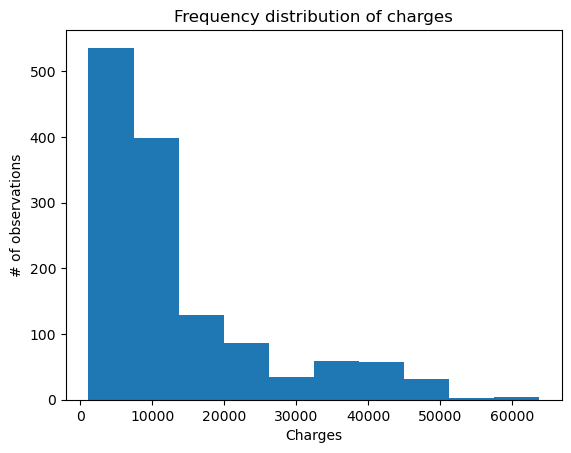

In [4]:
_= plt.hist(medical['charges'])
_= plt.xlabel('Charges')
_= plt.ylabel('# of observations')
_= plt.title('Frequency distribution of charges')
plt.show()

In [5]:
x = np.mean(medical['charges'])
x

13270.422265141257

In [6]:
s = np.std(medical['charges'])
s

12105.484975561605

**Comment:**
* The distribution of this data is highly skewed, which is why the mean is pulled to the left. Thus, the mean may not represent the typical value well. 
* The high standard deviation indicates that there is significant variability with in the data. The standard deviation is influenced by the shape of the distribution which is highly skewed and it may be exaggerated due to the long tail.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
* Here, we formulate the Null hypothesis by stating the population mean is less than 12,000 with the Alternative hypothesis, in this case, being the population mean could be a number greater than or equal to 12,000.
* For this, we'll assume that the data is collected from a credible source (i.e. the hospital), is collected through random sampling ith sufficient sample size and that it is representative of the population data it was taken from.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ In this case a one-sided confidence interval is appropriate since we are testing our hypothesis in one direction (wheather the population mean is really less that 12,000)

In [7]:
# Critical value for a one-sided interval
alpha = 0.05
q = 1 - (alpha)
n = medical.shape[0]
critical_val = t.ppf(q, n)
critical_val

1.645993261580807

In [8]:
z_score = (x - 12000)/(s/np.sqrt(n))
z_score

3.838786511901477

In [9]:
critical_val < z_score

True

**Comment:**
* The z_score indicated that: our sample mean of 13,270.4 is **3.838 standard deviations** away from the (assumed) null population mean of 12,000.
* Given the critical value of 1.64 at 95% confidence level (which significantly larger 3.838) shows that the observed sample mean of 13,270.4 is highly unlikely to have occurred by chance, if the null hypothesis that the population mean is 12,000, were true.
* **In conclusion:** Since the critical_val is less than the z_score, at 95% confidence level, **we reject the null hypothesis** that the population mean has fallen below 12,000 proving that the administrator's concern would be not valid 95% of the time. 


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
* **Null Hypothesis:** parameters for charges with insurance are equal to parameters for charges without.
* **Alternative Hypothesis:** parameters for charges with insurance are not equal to parameters for charges without insurance.

**Assumptions:**
* Here we are assuming that the two samples (charges with insurance & charges without insurance) are independant samples.
* The population variance is unknown but assumed to be roughly equal to the pooled vaiance.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ **Manual Calculation**

In [10]:
with_ins= medical[medical["insuranceclaim"] == 1]
without_ins = medical[medical["insuranceclaim"] == 0]

ch_with = with_ins["charges"]
ch_without = without_ins["charges"]

#Calculating the mean for both groups
mean_ch_with = np.mean(ch_with)
mean_ch_without= np.mean(ch_without)

#Calculating the variance for both
var_ch_with = np.var(ch_with)
var_ch_without = np.var(ch_without)

#Calculating the sample size for both
size_ch_with = len(ch_with)
size_ch_without = len(ch_without)

In [11]:
#Manually calculating the pooled variance with formula
sp = np.sqrt((((size_ch_with -1)* var_ch_with) + ((size_ch_without -1)* var_ch_without))/(size_ch_with + size_ch_without)-2)
sp

11503.675496756518

In [12]:
t_statistic = (mean_ch_with - mean_ch_without)/(sp* np.sqrt((1/size_ch_with)+(1/size_ch_without)))
t_statistic

11.910211866035501

Here the t-statistic is far from zero, it suggests a significant difference between the means of the two samples for charges with insurance & charges without insurance.

In [13]:
# Calculating degree of freedom 
df = (size_ch_with + size_ch_without) -1
df

1337

In [14]:
p_value = 2 * (1 - t.cdf(t_statistic, df=df))
p_value

0.0

In [15]:
#Using scipy to calculate t-statistic and p-value
from scipy.stats import ttest_ind

ttest_ind(ch_with, ch_without)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no z-test in the documentation. And it may be because we use the z test when we know the population variance and we have a very big sample size, which is usually not the case in most statistical problems. And t-score is more complicated to work out than a z-score which is why a code was needed.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test